# Test 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv("2025-11-30_14-13-12-680.csv")
vds = df.CH1.values*100  # x100 probe
iD =  df.CH2.values # x100 probe
Ts = df.Ts.values[0]
df.head()

,CH1,CH2,time,Ts
0,-0.023750,-0.519687,0.000000e+00,1.000000e-09
1,-0.024156,-0.640000,1.000000e-09,NaN
2,-0.016156,-0.638437,2.000000e-09,NaN
3,-0.015781,-0.479375,3.000000e-09,NaN
4,-0.028000,-0.439688,4.000000e-09,NaN


In [20]:
def trigger (sig , thresh= None, transition= "rise", marginI = 20):
    arr=[0]
    if thresh is None: 
        thresh = (sig.max()+sig.min())/2
    for i in range(1, len(sig)):
        if transition =="rise":
            if sig[i-1] <thresh and sig[i] >= thresh and i > arr[-1]+marginI:
                arr.append(i)
        elif sig[i-1] >thresh and sig[i] <= thresh and i > arr[-1]+marginI:
            arr.append(i)
    return arr[1:]


In [21]:
v0=vds[:200].mean()
i0= iD[:200].mean()
print(v0, i0)
vds2= vds-v0
id2=iD-i0

-2.2073593750000002 -0.5170828125


In [22]:
idx_rise = trigger (vds, transition= "rise")
idx_fall= trigger (vds, transition= "fall")
len(idx_rise), len(idx_fall)

(1, 1)

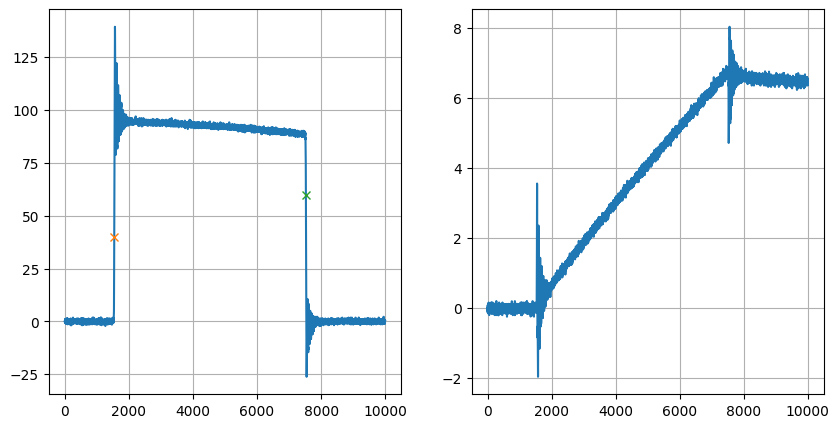

In [23]:
fig, axs = plt.subplots(1,2, figsize= (10,5))
axs[0].plot(vds2)
if len(idx_rise): 
    axs[0].plot(idx_rise, len(idx_rise)*[40], marker= "x")
if len(idx_fall): 
    axs[0].plot(idx_fall, len(idx_fall)*[60], marker= "x")
axs[1].plot(id2)
axs[0].grid()
axs[1].grid()

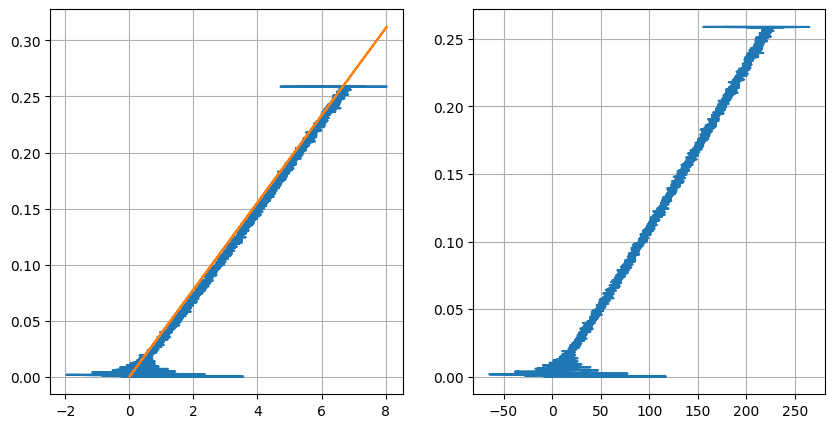

In [32]:
# https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf
# ELP 102/20/38 with I 102/7/38
# Ae = 534.2 mm2
Ae = 534.2e-6
# le = 121.2 mm
le = 121.2e-3
integV= np.cumsum(vds2)*Ts
N= 4
flux = integV/N
B = flux /Ae
H= N*id2/le
fig, axs = plt.subplots(1,2, figsize= (10,5))
plt.plot

L = 83e-6
Bcal = L*id2/(Ae*N)
AL = L/N**2 # L= AL *N**2 

#ALnom = 9600
#error =100*(AL*1e9-ALnom) /ALnom
#print ("AL (nH)= ", AL*1e9, "error %", error)

axs[0].plot(id2,B)
msk = (Bcal < 0.4)  & (id2 >0)
axs[0].plot(id2[msk],Bcal[msk])
axs[1].plot(H, B)
axs[0].grid()
axs[1].grid()

In [25]:
import numpy as np

# Core parameters (m, H/m)
AL_nom = 9600e-9
Ae = 534.2e-6
mu0 = 4 * np.pi * 1e-7
lg = 0.10e-3  # Total gap 2 * 0.05 mm

# Calculate new AL using the reluctance sum formula:
# 1/AL_gapped = 1/AL_nom + lg / (mu0 * Ae)
AL_gapped = 1 / ((1 / AL_nom) + (lg / (mu0 * Ae)))
L_air_gap = N**2*AL_gapped
print(f"AL (nH) with 0.10 mm gap: {AL_gapped * 1e9:.0f}")
print(f"L (uH) with 0.10 mm gap: {L_air_gap * 1e6:.0f}")

AL (nH) with 0.10 mm gap: 3951
L (uH) with 0.10 mm gap: 63


In [26]:
#v = L di/dt 
#dt = L di/v
v=85
di=10
L = 63e-6
dt= L*di/v
print(dt*1e6,"us")

7.411764705882353 us


# Test 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
df = pd.read_csv("2025-11-30_14-15-43-384.csv")
vds = df.CH1.values*100  # x100 probe
iD =  df.CH2.values # x100 probe
Ts = df.Ts.values[0]
df.head()

,CH1,CH2,time,Ts
0,-0.024000,-0.479375,0.000000e+00,1.000000e-09
1,-0.024000,-0.480312,1.000000e-09,NaN
2,-0.024000,-0.479687,2.000000e-09,NaN
3,-0.023906,-0.480625,3.000000e-09,NaN
4,-0.032156,-0.559688,4.000000e-09,NaN


In [34]:
def trigger (sig , thresh= None, transition= "rise", marginI = 20):
    arr=[0]
    if thresh is None: 
        thresh = (sig.max()+sig.min())/2
    for i in range(1, len(sig)):
        if transition =="rise":
            if sig[i-1] <thresh and sig[i] >= thresh and i > arr[-1]+marginI:
                arr.append(i)
        elif sig[i-1] >thresh and sig[i] <= thresh and i > arr[-1]+marginI:
            arr.append(i)
    return arr[1:]


In [35]:
v0=vds[:200].mean()
i0= iD[:200].mean()
print(v0, i0)
vds2= vds-v0
id2=iD-i0

-2.192515625 -0.5287375


In [36]:
idx_rise = trigger (vds, transition= "rise")
idx_fall= trigger (vds, transition= "fall")
len(idx_rise), len(idx_fall)

(1, 1)

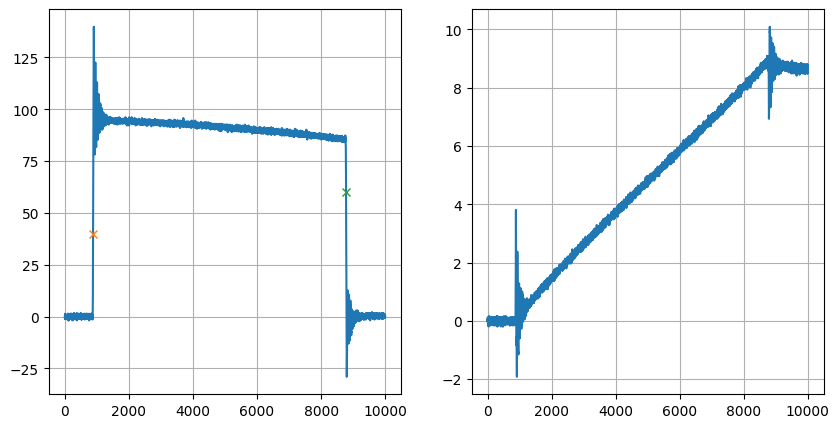

In [37]:
fig, axs = plt.subplots(1,2, figsize= (10,5))
axs[0].plot(vds2)
if len(idx_rise): 
    axs[0].plot(idx_rise, len(idx_rise)*[40], marker= "x")
if len(idx_fall): 
    axs[0].plot(idx_fall, len(idx_fall)*[60], marker= "x")
axs[1].plot(id2)
axs[0].grid()
axs[1].grid()

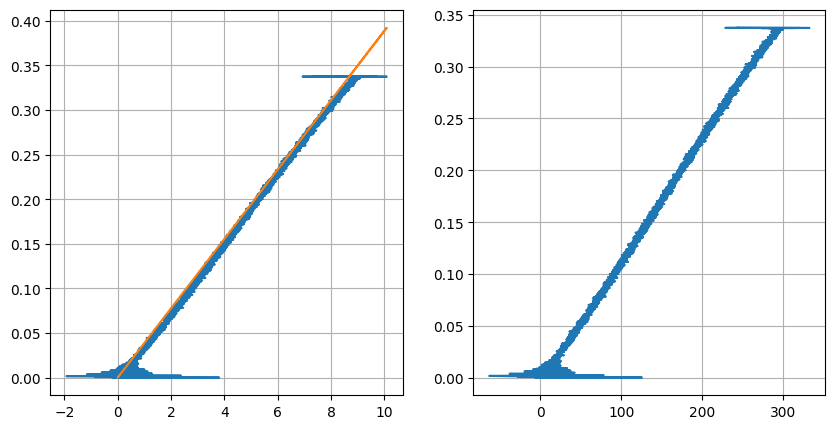

In [38]:
# https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf
# ELP 102/20/38 with I 102/7/38
# Ae = 534.2 mm2
Ae = 534.2e-6
# le = 121.2 mm
le = 121.2e-3
integV= np.cumsum(vds2)*Ts
N= 4
flux = integV/N
B = flux /Ae
H= N*id2/le
fig, axs = plt.subplots(1,2, figsize= (10,5))
plt.plot

L = 83e-6
Bcal = L*id2/(Ae*N)
AL = L/N**2 # L= AL *N**2 

#ALnom = 9600
#error =100*(AL*1e9-ALnom) /ALnom
#print ("AL (nH)= ", AL*1e9, "error %", error)

axs[0].plot(id2,B)
msk = (Bcal < 0.4)  & (id2 >0)
axs[0].plot(id2[msk],Bcal[msk])
axs[1].plot(H, B)
axs[0].grid()
axs[1].grid()

In [39]:
import numpy as np

# Core parameters (m, H/m)
AL_nom = 9600e-9
Ae = 534.2e-6
mu0 = 4 * np.pi * 1e-7
lg = 0.10e-3  # Total gap 2 * 0.05 mm

# Calculate new AL using the reluctance sum formula:
# 1/AL_gapped = 1/AL_nom + lg / (mu0 * Ae)
AL_gapped = 1 / ((1 / AL_nom) + (lg / (mu0 * Ae)))
L_air_gap = N**2*AL_gapped
print(f"AL (nH) with 0.10 mm gap: {AL_gapped * 1e9:.0f}")
print(f"L (uH) with 0.10 mm gap: {L_air_gap * 1e6:.0f}")

AL (nH) with 0.10 mm gap: 3951
L (uH) with 0.10 mm gap: 63
